In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv("rankingcard.csv", index_col=0)
print(data.shape)

(150000, 11)


In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# 探索数据以及数据预处理
缺失值，量纲是否统一，是否需要做哑变量

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

# 去除重复值

In [5]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [6]:
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

# 填补缺失值
- 空值比例
  - 2% 的可以直接删，或者用均值填补
  - 缺失 20% 的需要填补

In [7]:
data.isnull().sum() / data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

# 使用均值填补家属人数(缺2%)

In [8]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()), inplace=True)
data["NumberOfDependents"]

0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
149386    0.0
149387    2.0
149388    0.0
149389    0.0
149390    0.0
Name: NumberOfDependents, Length: 149391, dtype: float64

In [9]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

# 用随机森林填充收入(缺20%)

In [10]:
from sklearn.ensemble import RandomForestRegressor as RFR

def fill_missing_rf(X, y, to_fill):
    """
    随机森林填补一个特征的缺失值
    X: 要填补的特征矩阵
    y: 完整的没有缺失值的标签
    to_fill: 要填补的列名
    """
    
    df = X.copy()
    fill = df.loc[:, to_fill]
    df = pd.concat([df.loc[:, df.columns != to_fill], pd.DataFrame(y)], axis=1)
    
    # 分训练集测试集
    YTrain = fill[fill.notnull()] # 要填的那一列非空的部分
    YTest = fill[fill.isnull()] 
    XTrain = df.iloc[YTrain.index, :]
    XTest = df.iloc[YTest.index, :]
    
    rfr = RFR(n_estimators=100)
    rfr = rfr.fit(XTrain, YTrain)
    Ypredict = rfr.predict(XTest)
    
    return Ypredict

In [11]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X.shape

(149391, 10)

In [12]:
y_pred = fill_missing_rf(X, y, "MonthlyIncome")

In [13]:
# 确认结果合理后，将数据覆盖
data.loc[data.loc[:, "MonthlyIncome"].isnull(), "MonthlyIncome"] = y_pred

# 异常值

- 箱线图
- 3sigma 法则

In [14]:
# 描述性统计
# 参数为分位数
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.493910e+05,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,5.423329e+03,8.480892,0.238120,1.022391,0.212503,0.740393
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.323651e+04,5.136515,3.826165,1.130196,3.810523,1.108272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.003199,33.000000,0.000000,0.034991,1.800000e-01,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,1.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,4.418000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,7.416000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
90%,0.000000,0.978007,72.000000,1.000000,1275.000000,1.080000e+04,15.000000,0.000000,2.000000,0.000000,2.000000


In [15]:
# 异常值也被我们观察到,年龄的最小值居然有0,这不符合银行的业务需求,即便是儿童账户也要至少8岁,我们可以查看一下年龄为0的人有多少
(data["age"] == 0).sum()
data["NumberOfDependents"]

0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
149386    0.0
149387    2.0
149388    0.0
149389    0.0
149390    0.0
Name: NumberOfDependents, Length: 149391, dtype: float64

In [16]:
# 发现只有一个人年龄为0,可以判断这肯定是录入失误造成的,可以当成是缺失值来处理,直接删除掉这个样本
data = data[data["age"] != 0]

另外,有三个指标看起来很奇怪:

- "NumberOfTime30-59DaysPastDueNotWorse"
- "NumberOfTime60-89DaysPastDueNotWorse"
- "NumberOfTimes90DaysLate"

这三个指标分别是

- “过去两年内出现35-59天逾期但是没有发展的更坏的次数”
- “过去两年内出现60-89天逾期但是没有发展的更坏的次数”
- “过去两年内出现90天逾期的次数”

这三个指标,在99%的分布的时候依然是2,最大值却是98,看起来非常奇怪。一个人在过去两年内逾期35~59天98次,一年6个60天,两年内逾期98次这是怎么算出来的?我们可以去咨询业务人员,请教他们这个逾期次数是如何计算的。如果这个指标是正常的,那这些两年内逾期了98次的客户,应该都是坏客户。在我们无法询问他们情况下,我们查看一下有多少个样本存在这种异常:

In [17]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

## 有225个样本存在这样的情况，洞察这些疑似异常的样本。

In [18]:
# 这些标签并不都是 1
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1257.725135,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2962.860000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2032.548286,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,4.170000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,664.970000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


### 可以发现这些样本标签并不都是1,他们并不都是坏客户。因此,我们基本可以判断,这些样本是某种异常,应该把它们删除。

In [19]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [20]:
# 直接删掉
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

# 样本不均衡问题

In [21]:
# 探索标签的分布

X = data.iloc[:, 1:]
y = data.iloc[:, 0]
setting = set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
for i in X.loc[:,"NumberOfDependents"]:
    if not i in setting:
        print(i)
print(X.shape)

20.0
13.0
(149165, 10)


In [22]:
y.value_counts()
y

0         1
1         0
2         0
3         0
4         0
         ..
149160    0
149161    0
149162    0
149163    0
149164    0
Name: SeriousDlqin2yrs, Length: 149165, dtype: int64

In [23]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print("样本个数: {}; 1 占 {:.2%}; 0 占 {:.2%}".format(n_sample, n_1_sample / n_sample, n_0_sample / n_sample))

样本个数: 149165; 1 占 6.62%; 0 占 93.38%


In [24]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

In [25]:
setting = set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
for i in X.loc[:,"NumberOfDependents"]:
    if not i in setting:
        print(i)

X, y = sm.fit_sample(X, y)

# SMOTE 是有插值的

20.0
13.0


In [26]:
n_sample_ = X.shape[0]
n_sample_

278584

In [27]:
pd.Series(y).value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

# 分训练集和测试集

In [28]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)
y = pd.DataFrame(y)

XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.3, random_state=420)

In [29]:
model_data = pd.concat([YTrain, XTrain], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [30]:
test_data = pd.concat([YTest, XTest], axis=1)
test_data.index = range(test_data.shape[0])
test_data.columns = data.columns

In [31]:
model_data.to_csv("model_data.csv")
model_data["NumberOfDependents"]
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.015404,53,0,0.121802,4728.00000,5,0,0,0,0.000000
1,0,0.168311,63,0,0.141964,1119.00000,5,0,0,0,0.000000
2,1,1.063570,39,1,0.417663,3500.00000,5,1,0,2,3.716057
3,0,0.088684,73,0,0.522822,5301.00000,11,0,2,0,0.000000
4,1,0.622999,53,0,0.423650,13000.00000,9,0,2,0,0.181999
...,...,...,...,...,...,...,...,...,...,...,...
195003,1,0.916269,32,2,0.548132,6000.00000,10,0,1,0,3.966830
195004,1,0.484728,50,1,0.370603,5258.00000,12,0,1,0,2.000000
195005,1,0.850447,46,0,0.562610,8000.00000,9,0,1,0,2.768793
195006,0,1.000000,64,0,0.364694,10309.00000,7,0,3,0,0.000000


In [32]:
test_data.to_csv("test_data.csv")

# 分箱：离散化连续变量

In [33]:
model_data["age"]

0         53
1         63
2         39
3         73
4         53
          ..
195003    32
195004    50
195005    46
195006    64
195007    53
Name: age, Length: 195008, dtype: int64

# 等频分箱

pd.qcut,基于分位数的分箱函数,本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q:要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引,元素为分到的箱子的Series
现在返回两个值:每个样本属于哪个箱子,以及所有箱子的上限和下限

In [34]:
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)

In [35]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [36]:
model_data["qcut"].value_counts()

(36.0, 39.0]      12644
(20.999, 28.0]    11741
(58.0, 61.0]      11409
(48.0, 50.0]      11118
(46.0, 48.0]      10996
(31.0, 34.0]      10851
(50.0, 52.0]      10510
(43.0, 45.0]      10375
(61.0, 64.0]      10139
(39.0, 41.0]       9790
(41.0, 43.0]       9703
(52.0, 54.0]       9696
(28.0, 31.0]       9497
(74.0, 107.0]      9124
(64.0, 68.0]       8927
(54.0, 56.0]       8685
(68.0, 74.0]       8678
(56.0, 58.0]       7886
(34.0, 36.0]       7558
(45.0, 46.0]       5681
Name: qcut, dtype: int64

In [37]:
model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
qcut,,,,,,,,,,,
"(20.999, 28.0]",4243,4243,4243,4243,4243,4243,4243,4243,4243,4243,4243
"(28.0, 31.0]",3571,3571,3571,3571,3571,3571,3571,3571,3571,3571,3571
"(31.0, 34.0]",4075,4075,4075,4075,4075,4075,4075,4075,4075,4075,4075
"(34.0, 36.0]",2908,2908,2908,2908,2908,2908,2908,2908,2908,2908,2908
"(36.0, 39.0]",5182,5182,5182,5182,5182,5182,5182,5182,5182,5182,5182
"(39.0, 41.0]",3956,3956,3956,3956,3956,3956,3956,3956,3956,3956,3956
"(41.0, 43.0]",4002,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002
"(43.0, 45.0]",4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389
"(45.0, 46.0]",2419,2419,2419,2419,2419,2419,2419,2419,2419,2419,2419


# 统计每个分箱中 0 和 1 的数量
- 数据透视表功能 groupby

In [38]:
count_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
count_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [39]:
# zip 按照最短的列结合
num_bins = [*zip(updown, updown[1:], count_y0, count_y1)]

In [40]:
# 每个箱的上界，下界，0 出现的次数， 1 出现的次数
num_bins

[(21.0, 28.0, 4243, 7498),
 (28.0, 31.0, 3571, 5926),
 (31.0, 34.0, 4075, 6776),
 (34.0, 36.0, 2908, 4650),
 (36.0, 39.0, 5182, 7462),
 (39.0, 41.0, 3956, 5834),
 (41.0, 43.0, 4002, 5701),
 (43.0, 45.0, 4389, 5986),
 (45.0, 46.0, 2419, 3262),
 (46.0, 48.0, 4813, 6183),
 (48.0, 50.0, 4900, 6218),
 (50.0, 52.0, 4728, 5782),
 (52.0, 54.0, 4681, 5015),
 (54.0, 56.0, 4677, 4008),
 (56.0, 58.0, 4483, 3403),
 (58.0, 61.0, 6583, 4826),
 (61.0, 64.0, 6968, 3171),
 (64.0, 68.0, 6623, 2304),
 (68.0, 74.0, 6753, 1925),
 (74.0, 107.0, 7737, 1387)]

# 确保每个箱中都有 0 和 1

In [41]:
for i in range(20):
    # 如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(num_bins[0][0]
                          ,num_bins[1][1]
                          ,num_bins[0][2] + num_bins[1][2]
                          ,num_bins[0][3] + num_bins[1][3]
                         )]
        continue
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i - 1 : i + 1] = [(num_bins[i - 1][0]
                                       ,num_bins[i][1]
                                       ,num_bins[i - 1][2] + num_bins[i][2]
                                       ,num_bins[i - 1][3] + num_bins[i][3]
                                      )]
            break
        else:
            break
    
    print(len(num_bins))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [42]:
num_bins

[(21.0, 28.0, 4243, 7498),
 (28.0, 31.0, 3571, 5926),
 (31.0, 34.0, 4075, 6776),
 (34.0, 36.0, 2908, 4650),
 (36.0, 39.0, 5182, 7462),
 (39.0, 41.0, 3956, 5834),
 (41.0, 43.0, 4002, 5701),
 (43.0, 45.0, 4389, 5986),
 (45.0, 46.0, 2419, 3262),
 (46.0, 48.0, 4813, 6183),
 (48.0, 50.0, 4900, 6218),
 (50.0, 52.0, 4728, 5782),
 (52.0, 54.0, 4681, 5015),
 (54.0, 56.0, 4677, 4008),
 (56.0, 58.0, 4483, 3403),
 (58.0, 61.0, 6583, 4826),
 (61.0, 64.0, 6968, 3171),
 (64.0, 68.0, 6623, 2304),
 (68.0, 74.0, 6753, 1925),
 (74.0, 107.0, 7737, 1387)]

# 定义 WOE 和 IV 函数

In [43]:
def get_woe(num_bins):
    columns = ["min", "max", "count_0", "count_1"]
    df = pd.DataFrame(num_bins, columns=columns)
    
    df["total"] = df.count_0 + df.count_1 # 一个箱中所有的样本数
    df["percentage"] = df.total / df.total.sum() # 一个箱子里所有的样本数，占所有样本数的比例
    df["bad_rate"] = df.count_1 / df.total  
    df["good%"] = df.count_0 / df.count_0.sum()
    df["bad%"] = df.count_1 / df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df

def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

In [44]:
a = get_woe(num_bins)
a

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7498,11741,0.060208,0.638617,0.043433,0.077047,-0.573201
1,28.0,31.0,3571,5926,9497,0.048701,0.623987,0.036554,0.060894,-0.510340
2,31.0,34.0,4075,6776,10851,0.055644,0.624459,0.041713,0.069628,-0.512352
3,34.0,36.0,2908,4650,7558,0.038757,0.615242,0.029767,0.047782,-0.473237
4,36.0,39.0,5182,7462,12644,0.064838,0.590161,0.053045,0.076677,-0.368468
5,39.0,41.0,3956,5834,9790,0.050203,0.595914,0.040495,0.059948,-0.392305
6,41.0,43.0,4002,5701,9703,0.049757,0.587550,0.040966,0.058582,-0.357683
7,43.0,45.0,4389,5986,10375,0.053203,0.576964,0.044927,0.061510,-0.314158
8,45.0,46.0,2419,3262,5681,0.029132,0.574195,0.024762,0.033519,-0.302822
9,46.0,48.0,4813,6183,10996,0.056387,0.562295,0.049268,0.063535,-0.254319


In [45]:
i = get_iv(a)
i

0.3538242513107408

# 卡方检验，合并箱体，画出 IV 曲线

In [46]:
num_bins_ = num_bins.copy()

In [47]:
import matplotlib.pyplot as plt
import scipy

In [48]:
IV = []
axisx = []

In [49]:
num_bins_
x1 = num_bins_[0][2:]
x2 = num_bins_[1][2:]
scipy.stats.chi2_contingency([x1, x2])

(4.769614278676034,
 0.02896631476917573,
 1,
 array([[4319.81231754, 7421.18768246],
        [3494.18768246, 6002.81231754]]))

In [50]:
while len(num_bins_) > 2:
    print(len(num_bins_))
    pvs = []
    # 获取 bum_bin_ 两两之间卡方检验的置信度
    for i in range(len(num_bins_) - 1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i + 1][2:]
        pv = scipy.stats.chi2_contingency([x1, x2])[1] # 1 是 p 值, 0 是 chi 值
        pvs.append(pv)
    
    # 通过 p 值处理，合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(num_bins_[i][0]
                        ,num_bins_[i][1]
                        ,num_bins_[i][2] + num_bins_[i + 1][2]
                        ,num_bins_[i][3] + num_bins_[i + 1][3]
                       )]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
        

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3


In [51]:
axisx

[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]

In [52]:
IV

[0.35382414608138046,
 0.3538217260503175,
 0.35381745707606443,
 0.35380137718739885,
 0.35378579092228846,
 0.35375677041513764,
 0.3537155095395168,
 0.3536477069096787,
 0.35342749840301857,
 0.3532140214773526,
 0.35259517523808914,
 0.3517024094445062,
 0.3507008131832033,
 0.34793987815464067,
 0.3435162182962633,
 0.3352037966213173,
 0.31892456360975335,
 0.276460652502376]

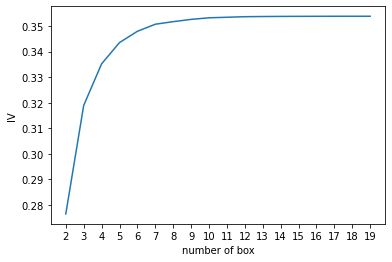

In [53]:
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

# 用最佳分箱个数分箱，验证分箱结果

In [54]:
def get_bin(my_num_bins, n):
    """
    my_num_bins: 待分箱
    n: 分箱个数 
    """
    while len(my_num_bins) > n:
        print(len(my_num_bins))
        pvs = []
        for i in range(len(my_num_bins) - 1):
            x1 = my_num_bins[i][2:]
            x2 = my_num_bins[i + 1][2:]
            pv = scipy.stats.chi2_contingency([x1, x2])[1]
            pvs.append(pv)
        
        i = pvs.index(max(pvs))
        my_num_bins[i: i+2] = [(my_num_bins[i][0]
                            ,my_num_bins[i][1]
                            ,my_num_bins[i][2] + my_num_bins[i + 1][2]
                            ,my_num_bins[i][3] + my_num_bins[i + 1][3]
                           )]
        
    return my_num_bins

In [55]:
aa = num_bins.copy()
aa

[(21.0, 28.0, 4243, 7498),
 (28.0, 31.0, 3571, 5926),
 (31.0, 34.0, 4075, 6776),
 (34.0, 36.0, 2908, 4650),
 (36.0, 39.0, 5182, 7462),
 (39.0, 41.0, 3956, 5834),
 (41.0, 43.0, 4002, 5701),
 (43.0, 45.0, 4389, 5986),
 (45.0, 46.0, 2419, 3262),
 (46.0, 48.0, 4813, 6183),
 (48.0, 50.0, 4900, 6218),
 (50.0, 52.0, 4728, 5782),
 (52.0, 54.0, 4681, 5015),
 (54.0, 56.0, 4677, 4008),
 (56.0, 58.0, 4483, 3403),
 (58.0, 61.0, 6583, 4826),
 (61.0, 64.0, 6968, 3171),
 (64.0, 68.0, 6623, 2304),
 (68.0, 74.0, 6753, 1925),
 (74.0, 107.0, 7737, 1387)]

In [56]:
afterbins = get_bin(aa, 4)

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5


In [57]:
afterbins

[(21.0, 28.0, 53867, 76293),
 (54.0, 56.0, 15743, 12237),
 (61.0, 64.0, 20344, 7400),
 (74.0, 107.0, 7737, 1387)]

In [58]:
bins_df = get_woe(aa)

In [59]:
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,53867,76293,130160,0.667460,0.586148,0.551402,0.783964,-0.351899
1,54.0,56.0,15743,12237,27980,0.143481,0.437348,0.161151,0.125744,0.248096
2,61.0,64.0,20344,7400,27744,0.142271,0.266724,0.208248,0.076040,1.007470
3,74.0,107.0,7737,1387,9124,0.046788,0.152017,0.079199,0.014252,1.715035


# 选取最佳分箱的过程

In [60]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
    自动最优分箱函数,基于卡方检验的分箱
    参数:
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0]
                              ,num_bins[1][1]
                              ,num_bins[0][2]+num_bins[1][2]
                              ,num_bins[0][3]+num_bins[1][3]
                              )]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0]
                                      ,num_bins[i][1]
                                      ,num_bins[i-1][2]+num_bins[i][2]
                                      ,num_bins[i-1][3]+num_bins[i][3]
                                      )]
                break
            else:
                break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []

    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins) -1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(num_bins[i][0]
                            ,num_bins[i+1][1]
                            ,num_bins[i][2]+num_bins[i+1][2]
                            ,num_bins[i][3]+num_bins[i+1][3]
                            )]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))

    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()

    return bins_df


In [61]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


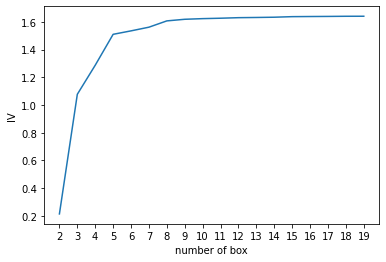

age


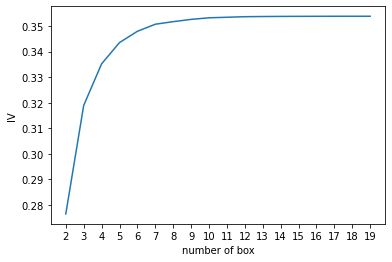

NumberOfTime30-59DaysPastDueNotWorse


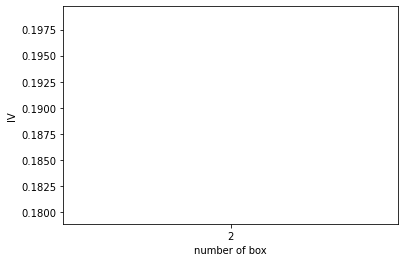

DebtRatio


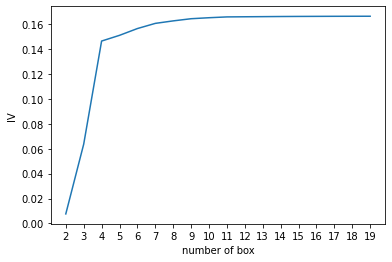

MonthlyIncome


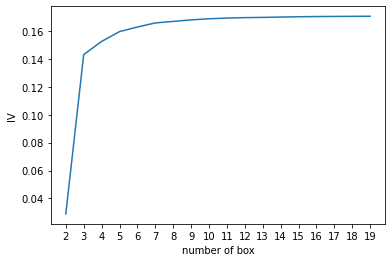

NumberOfOpenCreditLinesAndLoans


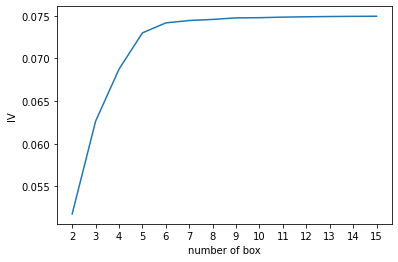

NumberOfTimes90DaysLate


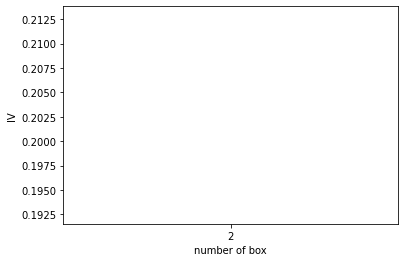

NumberRealEstateLoansOrLines


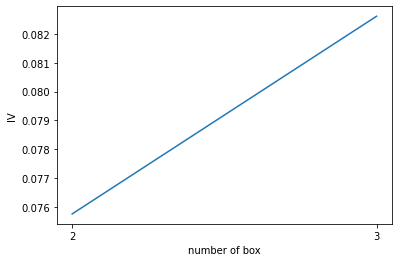

NumberOfTime60-89DaysPastDueNotWorse


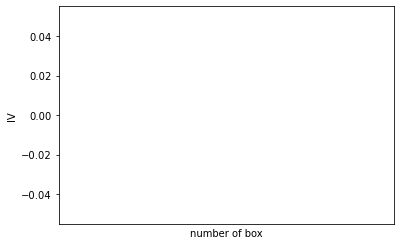

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [62]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data, i, "SeriousDlqin2yrs", n=2, q=20)

In [63]:
model_data["NumberOfDependents"]

0         0.000000
1         0.000000
2         3.716057
3         0.000000
4         0.181999
            ...   
195003    3.966830
195004    2.000000
195005    2.768793
195006    0.000000
195007    0.000000
Name: NumberOfDependents, Length: 195008, dtype: float64

# 不是所有特征都可以走这个分箱流程，因为有的特征无法分出20组
# 解法：将可以分箱的特征单独分组，不能自动分箱的自己观察后手写

In [64]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6
                 ,"age":5
                 ,"DebtRatio":4
                 ,"MonthlyIncome":3
                 ,"NumberOfOpenCreditLinesAndLoans":5
                }

#不能使用自动分箱的变量

hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
             ,"NumberOfDependents":[0,1,2,3]
            }

#保证区间覆盖使用 np.inf替换最大值,用-np.inf替换最小值

hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [65]:
# 对所有特征按照选择的箱体个数和手写的分箱范围进行分箱
bins_of_col = {}

# 生成自动分箱的分箱区间和分箱后的 IV 值

for col in auto_col_bins:
    bins_df = graphforbestbin(model_data
                              ,col
                              ,"SeriousDlqin2yrs"
                              ,n=auto_col_bins[col]
                              ,q=20
                              ,graph=False
                             )
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    # 保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0], bins_list[-1] = -np.inf, np.inf
    bins_of_col[col] = bins_list
    
# 合并手动分箱数据
bins_of_col.update(hand_bins)

bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09901053574999999,
  0.29757432640000003,
  0.465131117,
  0.982418665421648,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.01731254207314617,
  0.40169059251329137,
  1.4744706086960997,
  inf],
 'MonthlyIncome': [-inf, 0.1, 5588.269046034386, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

# 计算各个箱子的 WOE 并映射到数据中

In [66]:
data = model_data.copy()

# pd.cut 根据已知的分箱间隔把数据分箱
data = data[["age", "SeriousDlqin2yrs"]].copy()
data["cut"] = pd.cut(data["age"], [-np.inf, 36.0, 54.0, 61.0, 74.0, np.inf])
data

,age,SeriousDlqin2yrs,cut
0,53,0,"(36.0, 54.0]"
1,63,0,"(61.0, 74.0]"
2,39,1,"(36.0, 54.0]"
3,73,0,"(61.0, 74.0]"
4,53,1,"(36.0, 54.0]"
...,...,...,...
195003,32,1,"(-inf, 36.0]"
195004,50,1,"(36.0, 54.0]"
195005,46,1,"(36.0, 54.0]"
195006,64,0,"(61.0, 74.0]"


In [67]:
# 按照分箱结果取出其中的标签值
# 对每个箱中的 1 和 0 计数
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut           SeriousDlqin2yrs
(-inf, 36.0]  1                   24850
              0                   14797
(36.0, 54.0]  1                   51443
              0                   39070
(54.0, 61.0]  0                   15743
              1                   12237
(61.0, 74.0]  0                   20344
              1                    7400
(74.0, inf]   0                    7737
              1                    1387
Name: SeriousDlqin2yrs, dtype: int64

In [68]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14797,24850
"(36.0, 54.0]",39070,51443
"(54.0, 61.0]",15743,12237
"(61.0, 74.0]",20344,7400
"(74.0, inf]",7737,1387


In [69]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

In [70]:
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

In [71]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24850,-0.522269
"(36.0, 54.0]",39070,51443,-0.278955
"(54.0, 61.0]",15743,12237,0.248096
"(61.0, 74.0]",20344,7400,1.007470
"(74.0, inf]",7737,1387,1.715035


In [72]:
def get_woe(df, col, y, bins):
    df = df[[col, y]].copy()
    df["cut"] = pd.cut(df[col], bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [73]:
# 将所有 WOE 存储到字典中

woeall = {}

for col in bins_of_col:
    woeall[col] = get_woe(model_data, col, "SeriousDlqin2yrs", bins_of_col[col])
    
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.199833
 (0.099, 0.298]    0.665610
 (0.298, 0.465]   -0.121195
 (0.465, 0.982]   -1.073818
 (0.982, 1.0]     -0.482082
 (1.0, inf]       -2.030767
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.522269
 (36.0, 54.0]   -0.278955
 (54.0, 61.0]    0.248096
 (61.0, 74.0]    1.007470
 (74.0, inf]     1.715035
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0173]     1.499490
 (0.0173, 0.402]    0.037217
 (0.402, 1.474]    -0.388177
 (1.474, inf]       0.174886
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.1]        1.451433
 (0.1, 5588.269]   -0.239426
 (5588.269, inf]    0.232590
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.857931
 (1.0, 3.0]    -0.327289
 (3.0, 5.0]    -0.054617
 (5.0, 17.0]    0.124635
 (17.0, inf]    0.464888
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.352034
 (0.0, 1.0]    -0.870281
 (1.0, 2.0]    -1.378052
 (2.0, inf]    -1.544502
 dtype: floa

# 将所有 WOE 映射到原始数据

In [74]:
model_woe = pd.DataFrame(index=model_data.index)

In [75]:
model_woe["age"] = pd.cut(model_data["age"], bins_of_col["age"]).map(woeall["age"])

In [76]:
model_woe.head()

,age
0,-0.278955
1,1.007470
2,-0.278955
3,1.007470
4,-0.278955


In [77]:
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col], bins_of_col[col]).map(woeall[col])

In [78]:
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.278955,2.199833,0.037217,-0.239426,-0.054617,0.352034,0.237033,-0.391810,0.124837,0.628970
1,1.007470,0.665610,0.037217,-0.239426,-0.054617,0.352034,0.237033,-0.391810,0.124837,0.628970
2,-0.278955,-2.030767,-0.388177,-0.239426,-0.054617,-0.870281,-1.760884,-0.391810,-1.772896,-0.479332
3,1.007470,2.199833,-0.388177,-0.239426,0.124635,0.352034,0.237033,0.616967,0.124837,0.628970
4,-0.278955,-1.073818,-0.388177,0.232590,0.124635,0.352034,0.237033,0.616967,0.124837,-0.580359


In [79]:
# 将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

In [80]:
# 最终的建模数据(特征矩阵)
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.278955,2.199833,0.037217,-0.239426,-0.054617,0.352034,0.237033,-0.391810,0.124837,0.628970,0
1,1.007470,0.665610,0.037217,-0.239426,-0.054617,0.352034,0.237033,-0.391810,0.124837,0.628970,0
2,-0.278955,-2.030767,-0.388177,-0.239426,-0.054617,-0.870281,-1.760884,-0.391810,-1.772896,-0.479332,1
3,1.007470,2.199833,-0.388177,-0.239426,0.124635,0.352034,0.237033,0.616967,0.124837,0.628970,0
4,-0.278955,-1.073818,-0.388177,0.232590,0.124635,0.352034,0.237033,0.616967,0.124837,-0.580359,1


# 处理测试集
# 将已经计算好的 WOE 映射到测试集

In [81]:
test_woe = pd.DataFrame(index=test_data.index)

for col in bins_of_col:
    test_woe[col] = pd.cut(test_data[col], bins_of_col[col]).map(woeall[col])

test_woe["SeriousDlqin2yrs"] = test_data["SeriousDlqin2yrs"]

# 建模

In [82]:
x = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
test_x = test_woe.iloc[:,:-1]
test_y = test_woe.iloc[:,-1]

In [83]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR().fit(x, y)
lr.score(test_x, test_y)

0.77584474011678

# 用 C 和 max_iter 调参

In [84]:
c_1 = np.linspace(0.01, 1, 20)
c_2 = np.linspace(0.01, 0.2, 20)

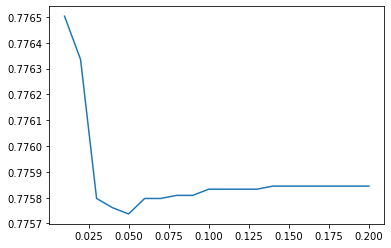

In [85]:
score = []
for i in c_2:
    lr = LR(solver="liblinear", C=i).fit(x, y)
    score.append(lr.score(test_x, test_y))
plt.figure()
plt.plot(c_2, score)
plt.show()

In [86]:
lr.n_iter_

array([5], dtype=int32)

/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: Conver

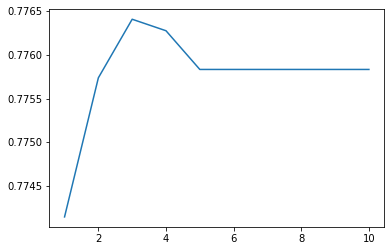

In [87]:
score = []
max_iter_list = range(1, 11)
for i in max_iter_list:
    lr = LR(solver='liblinear', C=0.025, max_iter=i).fit(x,y)
    score.append(lr.score(test_x, test_y))
plt.figure()
plt.plot(max_iter_list, score)
plt.show()

# ROC 曲线

In [88]:
# pip install scikit-plot
import scikitplot as skplt

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

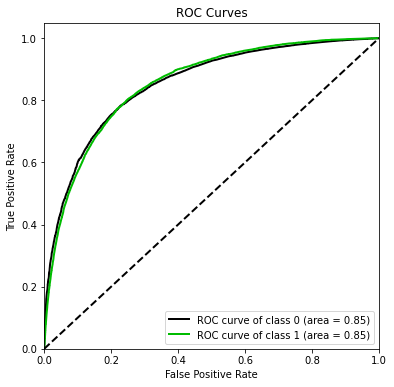

In [89]:
test_proba_df = pd.DataFrame(lr.predict_proba(test_x))
skplt.metrics.plot_roc(test_y, test_proba_df
                       ,plot_micro=False
                       ,figsize=(6,6)
                       ,plot_macro=False
                      )

# 制作评分卡

In [90]:
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.199833
 (0.099, 0.298]    0.665610
 (0.298, 0.465]   -0.121195
 (0.465, 0.982]   -1.073818
 (0.982, 1.0]     -0.482082
 (1.0, inf]       -2.030767
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.522269
 (36.0, 54.0]   -0.278955
 (54.0, 61.0]    0.248096
 (61.0, 74.0]    1.007470
 (74.0, inf]     1.715035
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0173]     1.499490
 (0.0173, 0.402]    0.037217
 (0.402, 1.474]    -0.388177
 (1.474, inf]       0.174886
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.1]        1.451433
 (0.1, 5588.269]   -0.239426
 (5588.269, inf]    0.232590
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.857931
 (1.0, 3.0]    -0.327289
 (3.0, 5.0]    -0.054617
 (5.0, 17.0]    0.124635
 (17.0, inf]    0.464888
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.352034
 (0.0, 1.0]    -0.870281
 (1.0, 2.0]    -1.378052
 (2.0, inf]    -1.544502
 dtype: floa

In [91]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B, A

(28.85390081777927, 481.8621880878296)

In [92]:
base_score = A - B * lr.intercept_
base_score

array([482.01620815])

In [93]:
lr.intercept_

array([-0.00533793])

In [94]:
score_age = woeall["age"] * (-B*lr.coef_[0][0])
score_age

cut
(-inf, 36.0]    -4.176357
(36.0, 54.0]    -2.230683
(54.0, 61.0]     1.983914
(61.0, 74.0]     8.056298
(74.0, inf]     13.714384
dtype: float64

In [95]:
file = "ScoreData.csv"

In [96]:
with open(file, "w") as f:
    f.write("base_score,{}\n".format(base_score))
for i, col in enumerate(x.columns):
    score = woeall[col] * (-B * lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file, header=True, mode="a")